<a href="https://colab.research.google.com/github/DEVDUTH14/Effect-of-technical-indicators-on-ML-based-stock-price-prediction./blob/main/CODE%2C%20ML-MODEL%20%26%20RESULTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#HDFC

Epoch 1/25
24/24 [==============================] - 8s 84ms/step - loss: 0.1127
Epoch 2/25
24/24 [==============================] - 3s 106ms/step - loss: 0.0137
Epoch 3/25
24/24 [==============================] - 3s 130ms/step - loss: 0.0109
Epoch 4/25
24/24 [==============================] - 2s 86ms/step - loss: 0.0094
Epoch 5/25
24/24 [==============================] - 2s 85ms/step - loss: 0.0097
Epoch 6/25
24/24 [==============================] - 2s 84ms/step - loss: 0.0085
Epoch 7/25
24/24 [==============================] - 3s 108ms/step - loss: 0.0086
Epoch 8/25
24/24 [==============================] - 3s 109ms/step - loss: 0.0086
Epoch 9/25
24/24 [==============================] - 3s 124ms/step - loss: 0.0082
Epoch 10/25
24/24 [==============================] - 2s 86ms/step - loss: 0.0084
Epoch 11/25
24/24 [==============================] - 2s 87ms/step - loss: 0.0076
Epoch 12/25
24/24 [==============================] - 2s 92ms/step - loss: 0.0081
Epoch 13/25
24/24 [=============

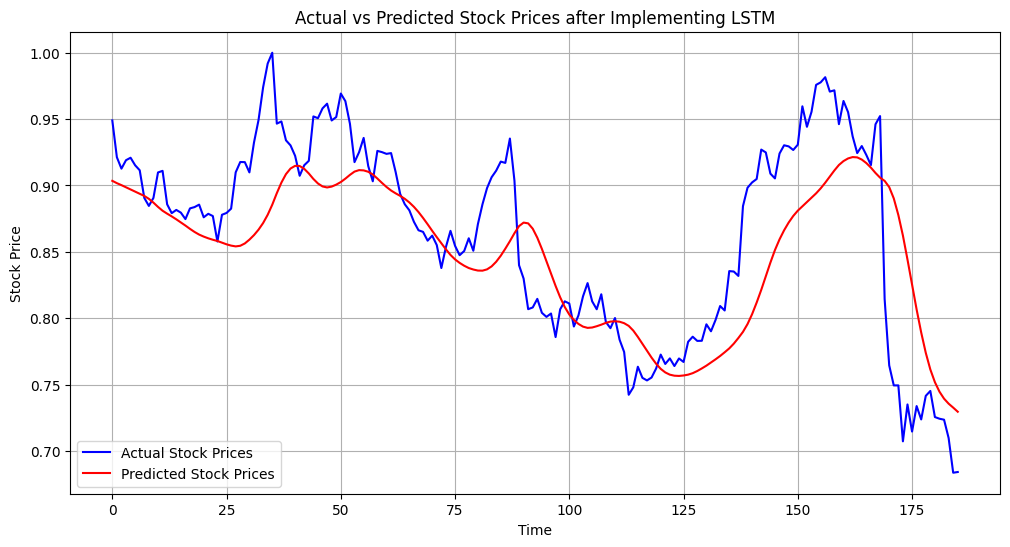

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
D=pd.read_csv("/content/D1 IND1 FINAL HDFC.csv")
data = D['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Choose sequence length
sequence_length = 60

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', score)

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Evaluate predictions (e.g., calculate RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Define a threshold for considering the prediction correct
threshold = 0.01  # 1% change in price

# Calculate the percentage change in actual prices
actual_change = np.abs(y_test[1:] - y_test[:-1]) / y_test[:-1]

# Calculate the percentage change in predicted prices
predicted_change = np.abs(predictions[1:] - predictions[:-1]) / predictions[:-1]

# Calculate the number of correct predictions based on the threshold
correct_predictions = np.sum(np.abs(actual_change - predicted_change) < threshold)

# Calculate the accuracy
accuracy = correct_predictions / len(y_test)

print('Accuracy:', accuracy)

import matplotlib.pyplot as plt

# Inverse scaling for testing data and predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Stock Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Stock Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices after Implementing LSTM')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/25
23/23 [==============================] - 8s 83ms/step - loss: 0.0895
Epoch 2/25
23/23 [==============================] - 2s 86ms/step - loss: 0.0135
Epoch 3/25
23/23 [==============================] - 3s 129ms/step - loss: 0.0102
Epoch 4/25
23/23 [==============================] - 2s 92ms/step - loss: 0.0090
Epoch 5/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0083
Epoch 6/25
23/23 [==============================] - 2s 83ms/step - loss: 0.0081
Epoch 7/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0087
Epoch 8/25
23/23 [==============================] - 2s 83ms/step - loss: 0.0076
Epoch 9/25
23/23 [==============================] - 2s 104ms/step - loss: 0.0074
Epoch 10/25
23/23 [==============================] - 3s 118ms/step - loss: 0.0080
Epoch 11/25
23/23 [==============================] - 2s 83ms/step - loss: 0.0079
Epoch 12/25
23/23 [==============================] - 2s 83ms/step - loss: 0.0069
Epoch 13/25
23/23 [===============

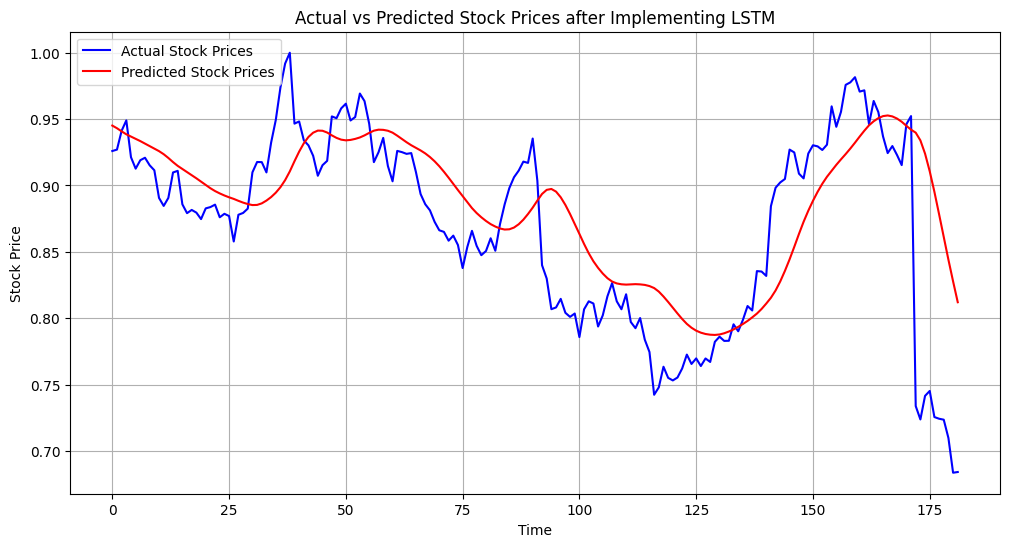

In [ ]:
D=pd.read_csv("/content/D1 IND2 FINAL HDFC.csv")
data = D['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Choose sequence length
sequence_length = 60

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', score)

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Evaluate predictions (e.g., calculate RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Define a threshold for considering the prediction correct
threshold = 0.01  # 1% change in price

# Calculate the percentage change in actual prices
actual_change = np.abs(y_test[1:] - y_test[:-1]) / y_test[:-1]

# Calculate the percentage change in predicted prices
predicted_change = np.abs(predictions[1:] - predictions[:-1]) / predictions[:-1]

# Calculate the number of correct predictions based on the threshold
correct_predictions = np.sum(np.abs(actual_change - predicted_change) < threshold)

# Calculate the accuracy
accuracy = correct_predictions / len(y_test)

print('Accuracy:', accuracy)

import matplotlib.pyplot as plt

# Inverse scaling for testing data and predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Stock Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Stock Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices after Implementing LSTM')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/25
23/23 [==============================] - 9s 88ms/step - loss: 0.0548
Epoch 2/25
23/23 [==============================] - 2s 84ms/step - loss: 0.0081
Epoch 3/25
23/23 [==============================] - 2s 90ms/step - loss: 0.0052
Epoch 4/25
23/23 [==============================] - 3s 123ms/step - loss: 0.0046
Epoch 5/25
23/23 [==============================] - 2s 106ms/step - loss: 0.0049
Epoch 6/25
23/23 [==============================] - 2s 85ms/step - loss: 0.0048
Epoch 7/25
23/23 [==============================] - 2s 85ms/step - loss: 0.0050
Epoch 8/25
23/23 [==============================] - 2s 84ms/step - loss: 0.0044
Epoch 9/25
23/23 [==============================] - 2s 86ms/step - loss: 0.0041
Epoch 10/25
23/23 [==============================] - 2s 106ms/step - loss: 0.0045
Epoch 11/25
23/23 [==============================] - 3s 146ms/step - loss: 0.0041
Epoch 12/25
23/23 [==============================] - 2s 84ms/step - loss: 0.0037
Epoch 13/25
23/23 [==============

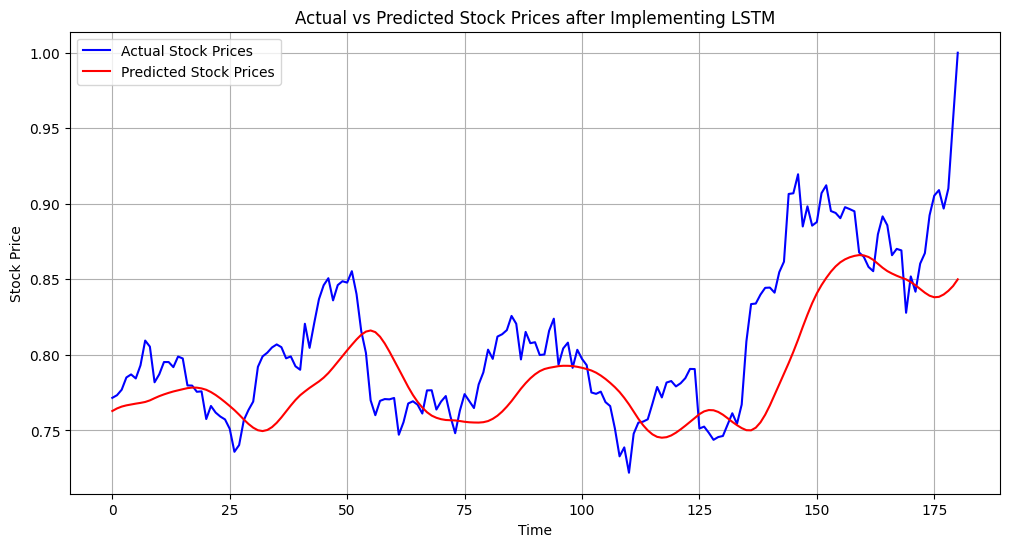

In [ ]:
D=pd.read_csv("/content/D2 IND 2 FINAL SBI.csv")
data = D['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Choose sequence length
sequence_length = 60

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', score)

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Evaluate predictions (e.g., calculate RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Define a threshold for considering the prediction correct
threshold = 0.01  # 1% change in price

# Calculate the percentage change in actual prices
actual_change = np.abs(y_test[1:] - y_test[:-1]) / y_test[:-1]

# Calculate the percentage change in predicted prices
predicted_change = np.abs(predictions[1:] - predictions[:-1]) / predictions[:-1]

# Calculate the number of correct predictions based on the threshold
correct_predictions = np.sum(np.abs(actual_change - predicted_change) < threshold)

# Calculate the accuracy
accuracy = correct_predictions / len(y_test)

print('Accuracy:', accuracy)

import matplotlib.pyplot as plt

# Inverse scaling for testing data and predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Stock Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Stock Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices after Implementing LSTM')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/25
23/23 [==============================] - 8s 81ms/step - loss: 0.0625
Epoch 2/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0107
Epoch 3/25
23/23 [==============================] - 2s 81ms/step - loss: 0.0060
Epoch 4/25
23/23 [==============================] - 2s 87ms/step - loss: 0.0048
Epoch 5/25
23/23 [==============================] - 3s 130ms/step - loss: 0.0045
Epoch 6/25
23/23 [==============================] - 2s 88ms/step - loss: 0.0052
Epoch 7/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0045
Epoch 8/25
23/23 [==============================] - 2s 83ms/step - loss: 0.0045
Epoch 9/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0044
Epoch 10/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0048
Epoch 11/25
23/23 [==============================] - 2s 106ms/step - loss: 0.0044
Epoch 12/25
23/23 [==============================] - 3s 126ms/step - loss: 0.0041
Epoch 13/25
23/23 [===============

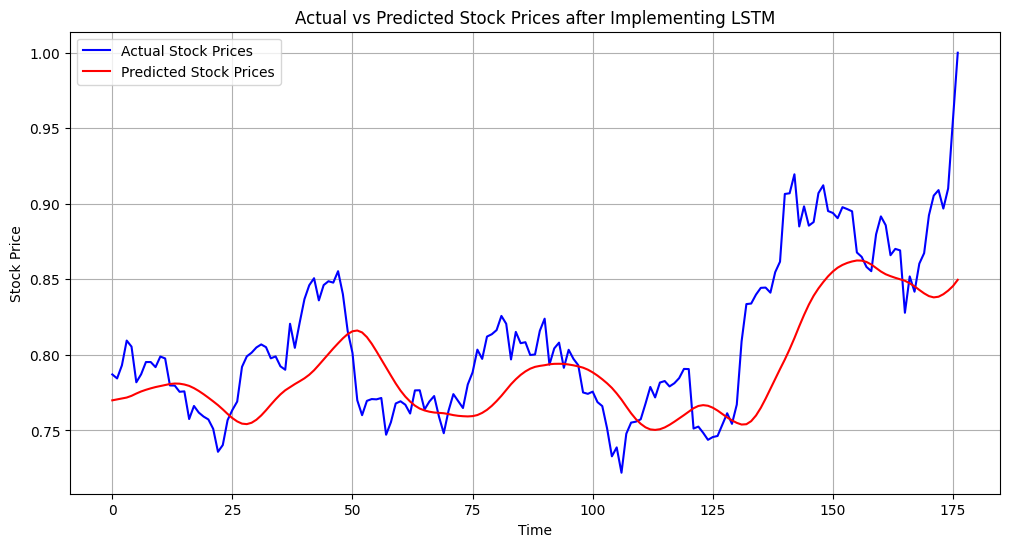

In [ ]:
D=pd.read_csv("/content/D2 IND1 FINAL SBI.csv")
data = D['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Choose sequence length
sequence_length = 60

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', score)

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Evaluate predictions (e.g., calculate RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Define a threshold for considering the prediction correct
threshold = 0.01  # 1% change in price

# Calculate the percentage change in actual prices
actual_change = np.abs(y_test[1:] - y_test[:-1]) / y_test[:-1]

# Calculate the percentage change in predicted prices
predicted_change = np.abs(predictions[1:] - predictions[:-1]) / predictions[:-1]

# Calculate the number of correct predictions based on the threshold
correct_predictions = np.sum(np.abs(actual_change - predicted_change) < threshold)

# Calculate the accuracy
accuracy = correct_predictions / len(y_test)

print('Accuracy:', accuracy)

import matplotlib.pyplot as plt

# Inverse scaling for testing data and predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Stock Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Stock Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices after Implementing LSTM')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/25
23/23 [==============================] - 9s 131ms/step - loss: 0.0615
Epoch 2/25
23/23 [==============================] - 2s 88ms/step - loss: 0.0143
Epoch 3/25
23/23 [==============================] - 2s 84ms/step - loss: 0.0086
Epoch 4/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0086
Epoch 5/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0079
Epoch 6/25
23/23 [==============================] - 2s 83ms/step - loss: 0.0081
Epoch 7/25
23/23 [==============================] - 3s 116ms/step - loss: 0.0071
Epoch 8/25
23/23 [==============================] - 3s 113ms/step - loss: 0.0077
Epoch 9/25
23/23 [==============================] - 2s 81ms/step - loss: 0.0070
Epoch 10/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0069
Epoch 11/25
23/23 [==============================] - 2s 84ms/step - loss: 0.0068
Epoch 12/25
23/23 [==============================] - 2s 84ms/step - loss: 0.0067
Epoch 13/25
23/23 [===============

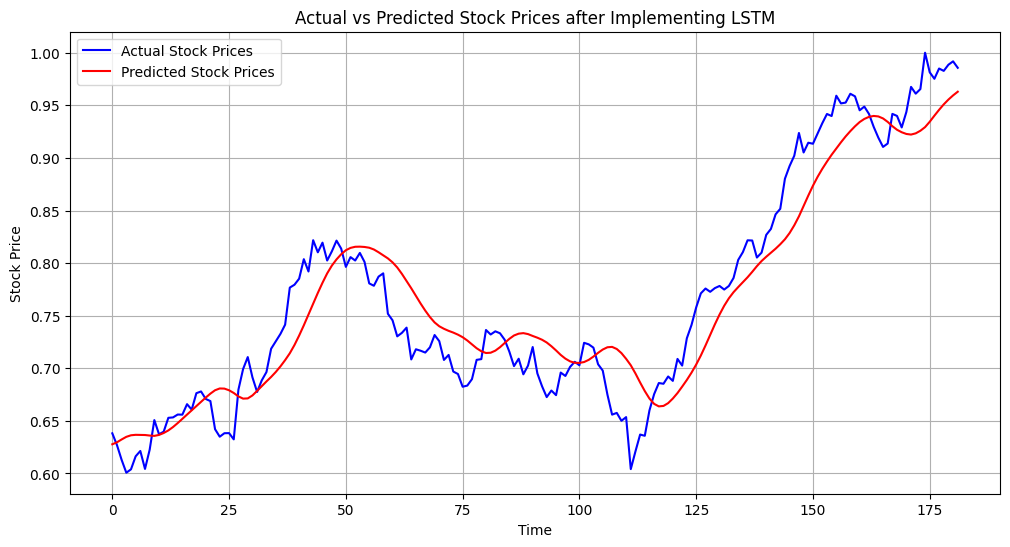

In [ ]:
D=pd.read_csv("/content/D3 IND 2 FINAL JPM.csv")
data = D['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Choose sequence length
sequence_length = 60

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', score)

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Evaluate predictions (e.g., calculate RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Define a threshold for considering the prediction correct
threshold = 0.01  # 1% change in price

# Calculate the percentage change in actual prices
actual_change = np.abs(y_test[1:] - y_test[:-1]) / y_test[:-1]

# Calculate the percentage change in predicted prices
predicted_change = np.abs(predictions[1:] - predictions[:-1]) / predictions[:-1]

# Calculate the number of correct predictions based on the threshold
correct_predictions = np.sum(np.abs(actual_change - predicted_change) < threshold)

# Calculate the accuracy
accuracy = correct_predictions / len(y_test)

print('Accuracy:', accuracy)

import matplotlib.pyplot as plt

# Inverse scaling for testing data and predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Stock Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Stock Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices after Implementing LSTM')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/25
24/24 [==============================] - 9s 94ms/step - loss: 0.0701
Epoch 2/25
24/24 [==============================] - 2s 86ms/step - loss: 0.0128
Epoch 3/25
24/24 [==============================] - 2s 84ms/step - loss: 0.0085
Epoch 4/25
24/24 [==============================] - 2s 83ms/step - loss: 0.0078
Epoch 5/25
24/24 [==============================] - 2s 83ms/step - loss: 0.0072
Epoch 6/25
24/24 [==============================] - 3s 124ms/step - loss: 0.0080
Epoch 7/25
24/24 [==============================] - 3s 103ms/step - loss: 0.0070
Epoch 8/25
24/24 [==============================] - 2s 82ms/step - loss: 0.0072
Epoch 9/25
24/24 [==============================] - 2s 84ms/step - loss: 0.0076
Epoch 10/25
24/24 [==============================] - 2s 82ms/step - loss: 0.0066
Epoch 11/25
24/24 [==============================] - 2s 81ms/step - loss: 0.0061
Epoch 12/25
24/24 [==============================] - 2s 104ms/step - loss: 0.0065
Epoch 13/25
24/24 [===============

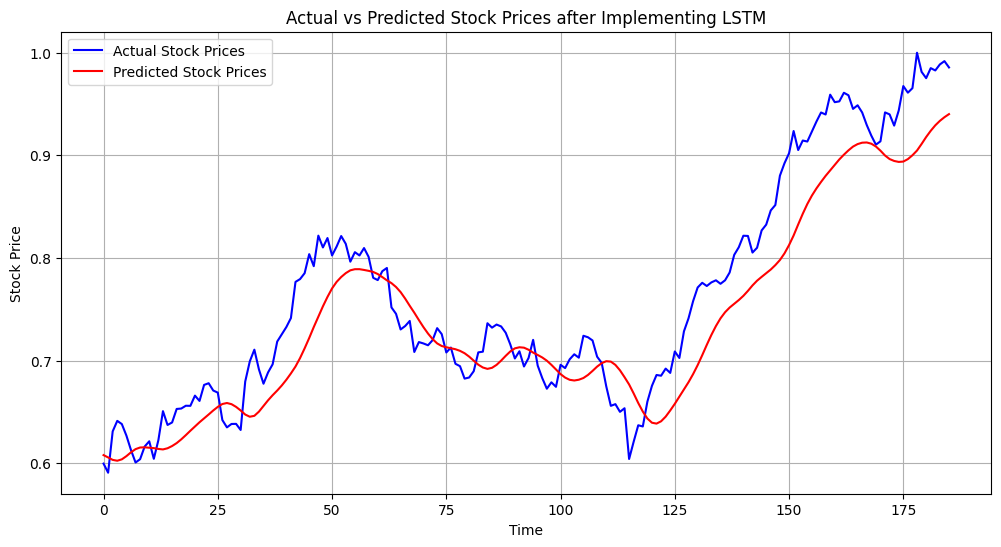

In [ ]:
D=pd.read_csv("/content/D3 IND1 FINAL JPM.csv")
data = D['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Choose sequence length
sequence_length = 60

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', score)

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Evaluate predictions (e.g., calculate RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Define a threshold for considering the prediction correct
threshold = 0.01  # 1% change in price

# Calculate the percentage change in actual prices
actual_change = np.abs(y_test[1:] - y_test[:-1]) / y_test[:-1]

# Calculate the percentage change in predicted prices
predicted_change = np.abs(predictions[1:] - predictions[:-1]) / predictions[:-1]

# Calculate the number of correct predictions based on the threshold
correct_predictions = np.sum(np.abs(actual_change - predicted_change) < threshold)

# Calculate the accuracy
accuracy = correct_predictions / len(y_test)

print('Accuracy:', accuracy)

import matplotlib.pyplot as plt

# Inverse scaling for testing data and predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Stock Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Stock Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices after Implementing LSTM')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/25
23/23 [==============================] - 9s 105ms/step - loss: 0.0740
Epoch 2/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0147
Epoch 3/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0095
Epoch 4/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0084
Epoch 5/25
23/23 [==============================] - 2s 83ms/step - loss: 0.0084
Epoch 6/25
23/23 [==============================] - 2s 95ms/step - loss: 0.0082
Epoch 7/25
23/23 [==============================] - 3s 127ms/step - loss: 0.0073
Epoch 8/25
23/23 [==============================] - 2s 83ms/step - loss: 0.0075
Epoch 9/25
23/23 [==============================] - 2s 84ms/step - loss: 0.0077
Epoch 10/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0066
Epoch 11/25
23/23 [==============================] - 2s 83ms/step - loss: 0.0073
Epoch 12/25
23/23 [==============================] - 2s 83ms/step - loss: 0.0061
Epoch 13/25
23/23 [================

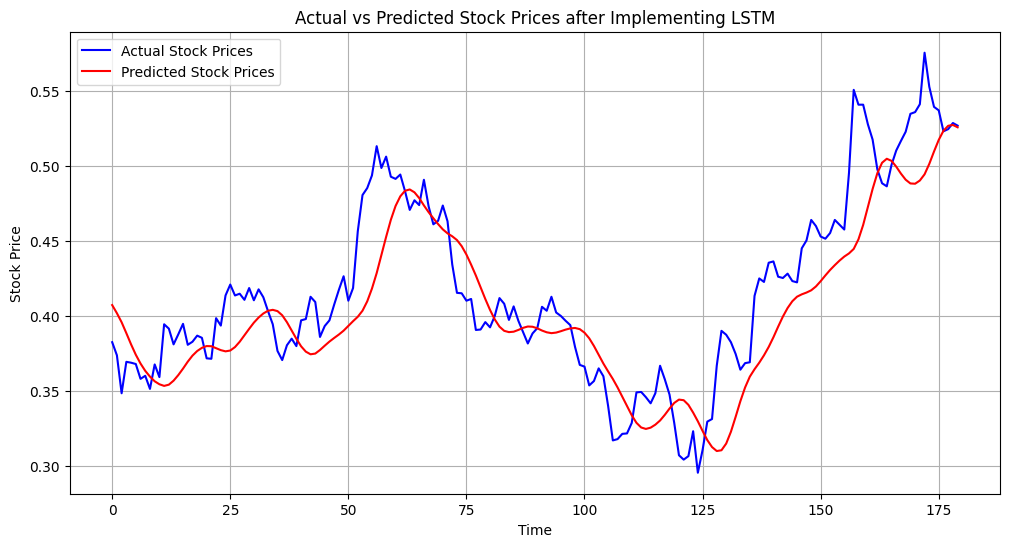

In [ ]:
D=pd.read_csv("/content/D4 IND 2 FINAL BAC.csv")
data = D['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Choose sequence length
sequence_length = 60

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', score)

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Evaluate predictions (e.g., calculate RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Define a threshold for considering the prediction correct
threshold = 0.01  # 1% change in price

# Calculate the percentage change in actual prices
actual_change = np.abs(y_test[1:] - y_test[:-1]) / y_test[:-1]

# Calculate the percentage change in predicted prices
predicted_change = np.abs(predictions[1:] - predictions[:-1]) / predictions[:-1]

# Calculate the number of correct predictions based on the threshold
correct_predictions = np.sum(np.abs(actual_change - predicted_change) < threshold)

# Calculate the accuracy
accuracy = correct_predictions / len(y_test)

print('Accuracy:', accuracy)

import matplotlib.pyplot as plt

# Inverse scaling for testing data and predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Stock Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Stock Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices after Implementing LSTM')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/25
23/23 [==============================] - 7s 83ms/step - loss: 0.0700
Epoch 2/25
23/23 [==============================] - 2s 95ms/step - loss: 0.0119
Epoch 3/25
23/23 [==============================] - 3s 130ms/step - loss: 0.0089
Epoch 4/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0085
Epoch 5/25
23/23 [==============================] - 2s 83ms/step - loss: 0.0079
Epoch 6/25
23/23 [==============================] - 2s 83ms/step - loss: 0.0083
Epoch 7/25
23/23 [==============================] - 2s 83ms/step - loss: 0.0079
Epoch 8/25
23/23 [==============================] - 2s 84ms/step - loss: 0.0072
Epoch 9/25
23/23 [==============================] - 3s 116ms/step - loss: 0.0076
Epoch 10/25
23/23 [==============================] - 3s 113ms/step - loss: 0.0069
Epoch 11/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0074
Epoch 12/25
23/23 [==============================] - 2s 82ms/step - loss: 0.0077
Epoch 13/25
23/23 [===============

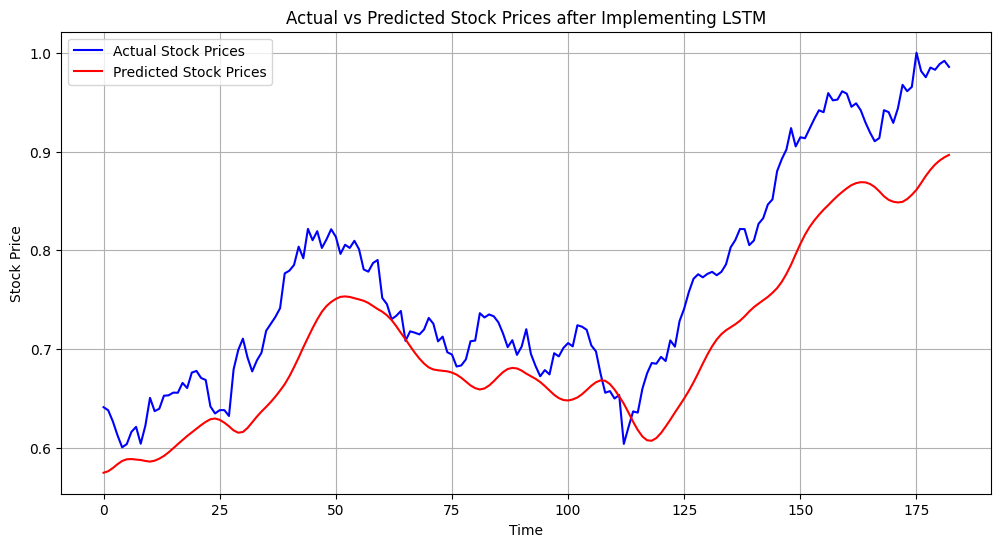

In [ ]:

D=pd.read_csv("/content/D4 IND1 FINAL BAC.csv")
data = D['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Choose sequence length
sequence_length = 60

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', score)

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Evaluate predictions (e.g., calculate RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Define a threshold for considering the prediction correct
threshold = 0.01  # 1% change in price

# Calculate the percentage change in actual prices
actual_change = np.abs(y_test[1:] - y_test[:-1]) / y_test[:-1]

# Calculate the percentage change in predicted prices
predicted_change = np.abs(predictions[1:] - predictions[:-1]) / predictions[:-1]

# Calculate the number of correct predictions based on the threshold
correct_predictions = np.sum(np.abs(actual_change - predicted_change) < threshold)

# Calculate the accuracy
accuracy = correct_predictions / len(y_test)

print('Accuracy:', accuracy)

import matplotlib.pyplot as plt

# Inverse scaling for testing data and predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Stock Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Stock Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices after Implementing LSTM')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/25
25/25 [==============================] - 18s 165ms/step - loss: 0.0449
Epoch 2/25
25/25 [==============================] - 5s 199ms/step - loss: 0.0104
Epoch 3/25
25/25 [==============================] - 6s 243ms/step - loss: 0.0087
Epoch 4/25
25/25 [==============================] - 4s 170ms/step - loss: 0.0074
Epoch 5/25
25/25 [==============================] - 4s 151ms/step - loss: 0.0071
Epoch 6/25
25/25 [==============================] - 4s 158ms/step - loss: 0.0073
Epoch 7/25
25/25 [==============================] - 2s 95ms/step - loss: 0.0070
Epoch 8/25
25/25 [==============================] - 2s 90ms/step - loss: 0.0066
Epoch 9/25
25/25 [==============================] - 2s 95ms/step - loss: 0.0064
Epoch 10/25
25/25 [==============================] - 3s 100ms/step - loss: 0.0061
Epoch 11/25
25/25 [==============================] - 3s 127ms/step - loss: 0.0067
Epoch 12/25
25/25 [==============================] - 3s 113ms/step - loss: 0.0062
Epoch 13/25
25/25 [========

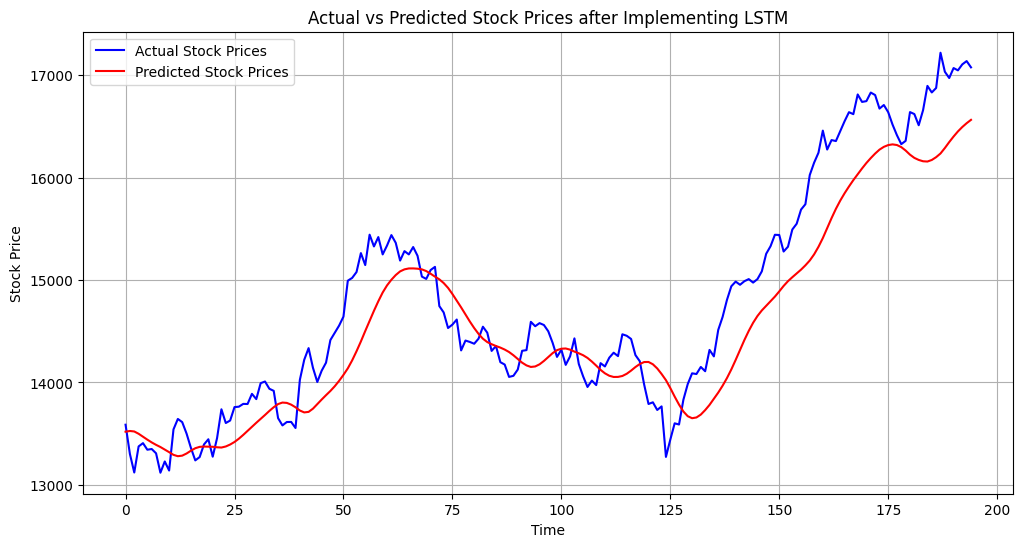

In [ ]:

D=pd.read_csv("/content/JPM.csv")
data = D['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Choose sequence length
sequence_length = 60

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', score)

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Evaluate predictions (e.g., calculate RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Define a threshold for considering the prediction correct
threshold = 0.01  # 1% change in price

# Calculate the percentage change in actual prices
actual_change = np.abs(y_test[1:] - y_test[:-1]) / y_test[:-1]

# Calculate the percentage change in predicted prices
predicted_change = np.abs(predictions[1:] - predictions[:-1]) / predictions[:-1]

# Calculate the number of correct predictions based on the threshold
correct_predictions = np.sum(np.abs(actual_change - predicted_change) < threshold)

# Calculate the accuracy
accuracy = correct_predictions / len(y_test)

print('Accuracy:', accuracy)

import matplotlib.pyplot as plt

# Inverse scaling for testing data and predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Stock Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Stock Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices after Implementing LSTM')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/25
25/25 [==============================] - 8s 119ms/step - loss: 0.0616
Epoch 2/25
25/25 [==============================] - 3s 101ms/step - loss: 0.0116
Epoch 3/25
25/25 [==============================] - 2s 82ms/step - loss: 0.0089
Epoch 4/25
25/25 [==============================] - 2s 83ms/step - loss: 0.0076
Epoch 5/25
25/25 [==============================] - 2s 84ms/step - loss: 0.0065
Epoch 6/25
25/25 [==============================] - 2s 83ms/step - loss: 0.0071
Epoch 7/25
25/25 [==============================] - 3s 124ms/step - loss: 0.0069
Epoch 8/25
25/25 [==============================] - 2s 98ms/step - loss: 0.0062
Epoch 9/25
25/25 [==============================] - 2s 83ms/step - loss: 0.0080
Epoch 10/25
25/25 [==============================] - 3s 103ms/step - loss: 0.0063
Epoch 11/25
25/25 [==============================] - 2s 83ms/step - loss: 0.0062
Epoch 12/25
25/25 [==============================] - 2s 89ms/step - loss: 0.0055
Epoch 13/25
25/25 [==============

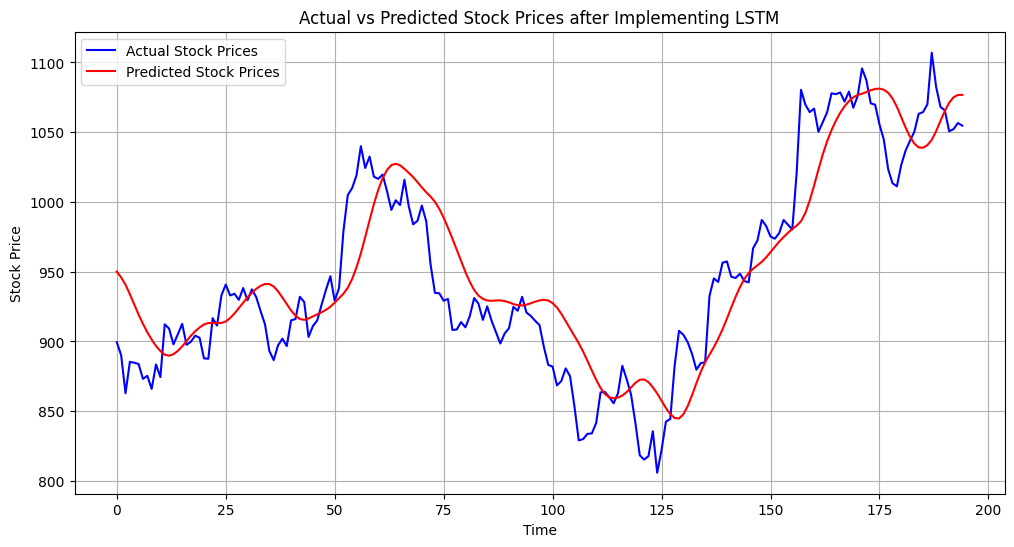

In [ ]:

D=pd.read_csv("/content/BAC.csv")
data = D['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Choose sequence length
sequence_length = 60

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', score)

# Make predictions
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Evaluate predictions (e.g., calculate RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Define a threshold for considering the prediction correct
threshold = 0.01  # 1% change in price

# Calculate the percentage change in actual prices
actual_change = np.abs(y_test[1:] - y_test[:-1]) / y_test[:-1]

# Calculate the percentage change in predicted prices
predicted_change = np.abs(predictions[1:] - predictions[:-1]) / predictions[:-1]

# Calculate the number of correct predictions based on the threshold
correct_predictions = np.sum(np.abs(actual_change - predicted_change) < threshold)

# Calculate the accuracy
accuracy = correct_predictions / len(y_test)

print('Accuracy:', accuracy)

import matplotlib.pyplot as plt

# Inverse scaling for testing data and predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler.inverse_transform(predictions)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Stock Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Stock Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices after Implementing LSTM')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pd.read_csv("/content/D1 IND2 FINAL HDFC.csv")



,Date,Open,High,Low,Close,Adj Close,Volume,ADX,ATR,OBV,BB_Middle,BB_Upper,BB_Lower
0,07-02-2020,0.499003,0.461214,0.505461,0.494014,0.470596,0.039302,0.017699,0.081137,0.192865,0.466865,0.395422,0.532570
1,10-02-2020,0.495803,0.456939,0.499769,0.492035,0.468711,0.053167,0.014354,0.074622,0.187722,0.464032,0.388816,0.533676
2,11-02-2020,0.496170,0.469657,0.512076,0.492348,0.469009,0.066971,0.008562,0.068636,0.194201,0.461001,0.380302,0.536161
3,12-02-2020,0.498164,0.467441,0.518230,0.501093,0.477340,0.036318,0.003183,0.057136,0.197714,0.458816,0.372977,0.539021
4,13-02-2020,0.513589,0.474829,0.507512,0.493181,0.469802,0.052546,0.000000,0.064346,0.192631,0.455949,0.362353,0.543686
...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,05-02-2024,0.708867,0.677467,0.713092,0.704997,0.711209,0.222621,0.823028,0.290179,0.672701,0.819280,0.900924,0.679697
963,06-02-2024,0.708395,0.675145,0.711604,0.704217,0.710445,0.236869,0.840498,0.268987,0.649787,0.805683,0.880070,0.675235
964,07-02-2024,0.716212,0.679472,0.705502,0.689485,0.696023,0.316226,0.858424,0.262151,0.619196,0.792011,0.859563,0.670335
965,08-02-2024,0.691920,0.663799,0.678683,0.661478,0.668607,0.398510,0.881923,0.270241,0.580644,0.776334,0.835323,0.665368


In [ ]:
pd.read_csv("/content/D2 IND 2 FINAL SBI.csv")

,Date,Open,High,Low,Close,Adj Close,Volume,ADX,ATR,OBV,BB_Middle,BB_Upper,BB_Lower
0,07-02-2020,0.320844,0.303695,0.319346,0.309276,0.292531,0.158261,0.345264,0.260695,0.067471,0.324829,0.307775,0.336786
1,10-02-2020,0.317627,0.299806,0.315755,0.305540,0.288997,0.099990,0.319559,0.244691,0.062537,0.323544,0.303928,0.338253
2,11-02-2020,0.319992,0.305109,0.324355,0.316202,0.299081,0.125420,0.287482,0.234676,0.068539,0.323161,0.302510,0.338975
3,12-02-2020,0.336739,0.312356,0.320953,0.308639,0.291927,0.166800,0.250919,0.241607,0.060799,0.322736,0.301382,0.339310
4,13-02-2020,0.321790,0.314212,0.326151,0.321852,0.304425,0.278439,0.219708,0.248528,0.073227,0.323171,0.302945,0.338541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,02-02-2024,0.946258,0.896853,0.939892,0.909058,0.910120,0.112560,0.201519,0.628199,0.979791,0.979994,0.947142,0.971601
957,05-02-2024,0.936985,0.886689,0.924865,0.896847,0.898052,0.116667,0.187733,0.633185,0.974157,0.980015,0.947209,0.971573
958,06-02-2024,0.931971,0.887043,0.922881,0.910151,0.911200,0.049168,0.172663,0.643871,0.976956,0.980886,0.950373,0.969994
959,07-02-2024,0.952029,0.927612,0.955581,0.955714,0.956231,0.179890,0.191857,0.704184,0.985245,0.985948,0.969372,0.960185


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
_df_12['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)